<a href="https://colab.research.google.com/github/EgaLutviani/Data-Produk-Elektronik/blob/main/Naive_Bayes_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Buatkan pemanggilan data ini kemudian analisis naive bayesnya

Here is all the data you need:
"diabetes.csv"

## Data loading

### Subtask:
Load the "diabetes.csv" file into a pandas DataFrame.


**Reasoning**:
Load the "diabetes.csv" file into a pandas DataFrame and display the first few rows.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('diabetes.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'diabetes.csv' not found. Please ensure the file exists in the current directory.")
    df = None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,8,188,78,0,0,47.9,0.137,43,1
1,7,152,88,44,0,50.0,0.337,36,1
2,2,99,52,15,94,24.6,0.637,21,0
3,1,109,56,21,135,25.2,0.833,23,0
4,2,88,74,19,53,29.0,0.229,22,0


## Data exploration

### Subtask:
Explore the loaded diabetes dataset to understand its characteristics.


**Reasoning**:
Explore the dataset by checking its shape, data types, descriptive statistics, missing values, and the distribution of the target variable 'Outcome'.  Visualize the distribution of 'Outcome' to understand class imbalance.



Shape of the DataFrame: (768, 9)

Data types of each column:
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Descriptive statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000

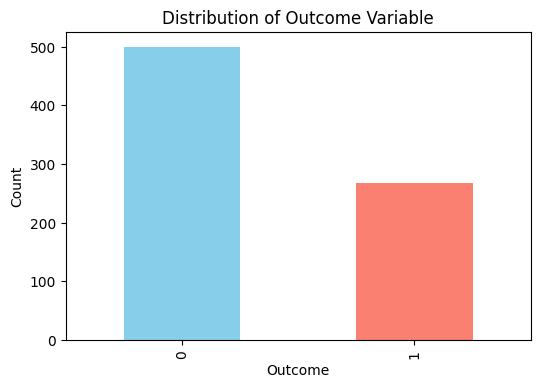

<Figure size 1000x600 with 0 Axes>

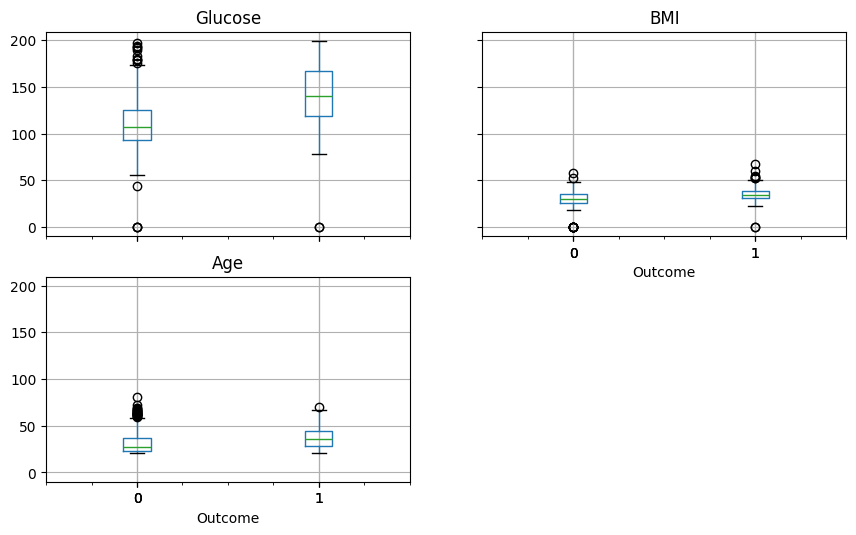

In [ ]:
import matplotlib.pyplot as plt

# Check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Identify data types of each column
print("\nData types of each column:\n", df.dtypes)

# Descriptive statistics for numerical features
print("\nDescriptive statistics:\n", df.describe())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Analyze the distribution of the 'Outcome' variable
print("\nDistribution of 'Outcome' variable:\n", df['Outcome'].value_counts())
plt.figure(figsize=(6, 4))
df['Outcome'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Outcome Variable')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

# Explore relationships between features and the target variable (example: box plot)
plt.figure(figsize=(10, 6))
df.boxplot(column=['Glucose', 'BMI', 'Age'], by='Outcome', figsize=(10, 6))
plt.suptitle('') # Remove the default subplot title
plt.title('Relationship between features and Outcome')
plt.show()

## Data preparation

### Subtask:
Prepare the data for model training by handling potential missing values and scaling numerical features.


**Reasoning**:
Impute missing values (represented as zeros) with the median of each column for specific features and then apply standardization to numerical features, excluding 'Outcome'.  Finally, create a new dataframe `df_prepared` containing the preprocessed data.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Columns where 0 is considered a missing value
zero_impute_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Impute missing values with median for specified columns
for col in zero_impute_cols:
    df[col] = df[col].replace(0, df[col].median())

# Apply standardization to numerical features (excluding 'Outcome')
numerical_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Create new DataFrame for prepared data
df_prepared = df.copy()

display(df_prepared.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.233880,2.181036,0.464339,-0.469981,-0.608201,2.248485,-1.011366,0.830381,1
1,0.936914,0.997544,1.291553,1.806935,-0.608201,2.554122,-0.407342,0.234767,1
2,-0.547919,-0.744819,-1.686419,-1.337377,-0.006185,-1.142634,0.498693,-1.041549,0
3,-0.844885,-0.416071,-1.355533,-0.686830,0.382519,-1.055309,1.090636,-0.871374,0
4,-0.547919,-1.106442,0.133453,-0.903679,-0.394888,-0.502251,-0.733515,-0.956462,0


## Data splitting

### Subtask:
Split the prepared dataset into training and testing sets.


**Reasoning**:
Split the prepared dataset (df_prepared) into training and testing sets using train_test_split, stratifying by the 'Outcome' column.



In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_prepared.drop('Outcome', axis=1)
y = df_prepared['Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Model training

### Subtask:
Train a Gaussian Naive Bayes classifier on the prepared training data.


**Reasoning**:
Train a Gaussian Naive Bayes classifier using the prepared training data (X_train, y_train).



In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes classifier
gnb_model = GaussianNB()

# Train the classifier using the training data
gnb_model.fit(X_train, y_train)

GaussianNB()

## Model evaluation

### Subtask:
Evaluate the trained Gaussian Naive Bayes model's performance on the test dataset.


**Reasoning**:
Evaluate the trained Gaussian Naive Bayes model using the test dataset and display the evaluation metrics and confusion matrix.



Accuracy: 0.7273
Precision: 0.6071
Recall: 0.6296
F1-score: 0.6182


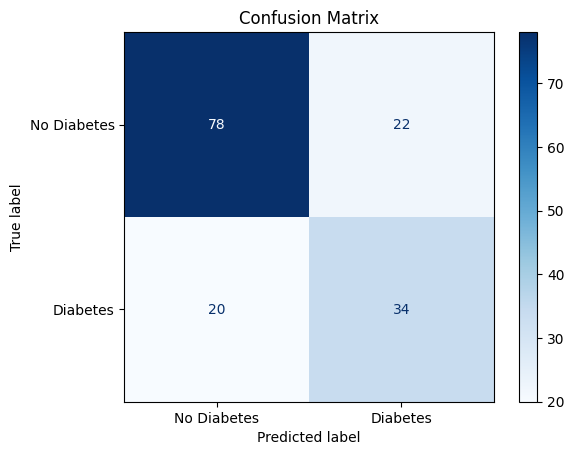


Summary of Evaluation Results:
The Gaussian Naive Bayes model achieved an accuracy of 0.7273 on the test dataset.
The precision of the model is 0.6071, indicating the proportion of correctly predicted positive cases out of all predicted positive cases.
The recall of the model is 0.6296, indicating the proportion of correctly predicted positive cases out of all actual positive cases.
The F1-score, which is the harmonic mean of precision and recall, is 0.6182.
The confusion matrix provides a visual representation of the model's performance, showing the counts of true positive, true negative, false positive, and false negative predictions.
Based on these metrics, the model's performance can be further analyzed.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict the target variable for the test data
y_pred = gnb_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

print("\nSummary of Evaluation Results:")
print("The Gaussian Naive Bayes model achieved an accuracy of {:.4f} on the test dataset.".format(accuracy))
print("The precision of the model is {:.4f}, indicating the proportion of correctly predicted positive cases out of all predicted positive cases.".format(precision))
print("The recall of the model is {:.4f}, indicating the proportion of correctly predicted positive cases out of all actual positive cases.".format(recall))
print("The F1-score, which is the harmonic mean of precision and recall, is {:.4f}.".format(f1))
print("The confusion matrix provides a visual representation of the model's performance, showing the counts of true positive, true negative, false positive, and false negative predictions.")
print("Based on these metrics, the model's performance can be further analyzed.")

## Summary:

### 1. Q&A

The analysis aimed to build and evaluate a Gaussian Naive Bayes model for diabetes prediction.  The key question is: *How well does a Gaussian Naive Bayes model perform in predicting diabetes based on the provided dataset?*

The model achieved a moderate accuracy of 0.7273 on the test set.  The precision was 0.6071 and the recall was 0.6296, with an F1-score of 0.6182.


### 2. Data Analysis Key Findings

* **Data Preprocessing:** Missing values (represented as zeros) in 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI' columns were imputed with the median of each column. Numerical features were standardized using `StandardScaler`.
* **Class Imbalance:** The 'Outcome' variable (diabetes diagnosis) is imbalanced, with 500 instances of class 0 (no diabetes) and 268 instances of class 1 (diabetes). This was addressed by using stratified sampling during data splitting.
* **Model Performance:** The Gaussian Naive Bayes model achieved an accuracy of 0.7273, precision of 0.6071, recall of 0.6296, and an F1-score of 0.6182 on the test set.


### 3. Insights or Next Steps

* **Investigate Feature Engineering:** Explore other feature engineering techniques or consider different imputation strategies to potentially improve model performance, especially given the initial presence of zero values that might represent missing data.
* **Explore Other Models:** Evaluate other classification algorithms (e.g., Logistic Regression, Support Vector Machines, Random Forest) to compare their performance against the Naive Bayes model.  The imbalance in the dataset might benefit from models that handle this better.
